In [12]:
name = "Moeez Mujahid"
r_num = "L1F17BSCS0181"

print("Name: {0}".format(name))
print("Roll Number: {0}".format(r_num))

Name: Moeez Mujahid
Roll Number: L1F17BSCS0181


In [13]:
!ls

 glove.6B.100d.txt   glove.6B.zip.1	       Tweets.gsheet
 glove.6B.200d.txt   model.png		      'Tweets LSTM CNN.ipynb'
 glove.6B.300d.txt   Tweets_CNN_2class.ipynb   Tweets_sentiments_Naive.ipynb
 glove.6B.50d.txt   'Tweets CNN.ipynb'
 glove.6B.zip	     Tweets.csv


In [14]:
import os
os.chdir('/content/drive/MyDrive/DataScience/Project')

In [15]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [17]:
tweets = pd.read_csv('Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
print(tweets.info())
desc1 = tweets.describe()
print(desc1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [19]:
#tweets_df=tweets.drop(tweets[tweets['airline_sentiment_confidence']<0.5].index,axis=0)
#tweets_df.shape

df=tweets 

df_req = pd.DataFrame({
    "sentiment":tweets.airline_sentiment,
    "text":tweets.text
})
df_req.head()

,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


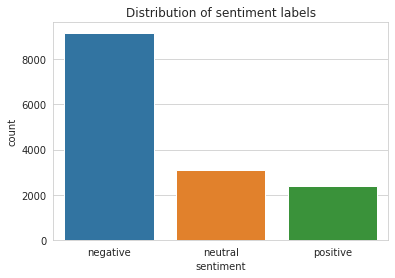

In [20]:
import seaborn as sns
# X is my features while y are outcomes
df_req.sentiment.replace(['negative', 'neutral', 'positive'],[0,1,2],inplace=True)


df_req.sample(5)
sns.set_style("whitegrid")
sns.countplot(data=df_req,x='sentiment')
index = [0,1,2]
plt.xticks(index,['negative','neutral','positive'])
plt.title("Distribution of sentiment labels")
plt.show()



In [22]:

X=df_req['text']
y=df_req['sentiment']
print(X,y)


0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object 0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: sentiment, Length: 14640, dtype: int64


In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# some useless words to be removed
''''
[u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', 
u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', 
u'their', u'theirs', u'themselves', u'what']
'''

stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()



In [25]:
import re
airline_names=["virginamerica","united","southwestair","jetblue", "usairways","americanair"]
shortword = re.compile(r"\b\w{1,2}\b")
url = re.compile(r"https?:*/+[a-zA-Z0-9./]*")
cleaned_data=[]
for i in range(len(X)):
   tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])

   #tweet = re.sub(url,'',tweet)
   #tweet = re.sub(shortword,'',tweet)
   
   tweet = tweet.replace('@','')
   tweet = tweet.replace('#','')

   tweet=tweet.lower().split()
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct) and (word not in airline_names)]
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

   

In [26]:
print(cleaned_data[0])
print(cleaned_data[1])
print(cleaned_data[3])

dhepburn said
plu ad commerci experi tacki
realli aggress blast obnoxi entertain guest face amp littl recours


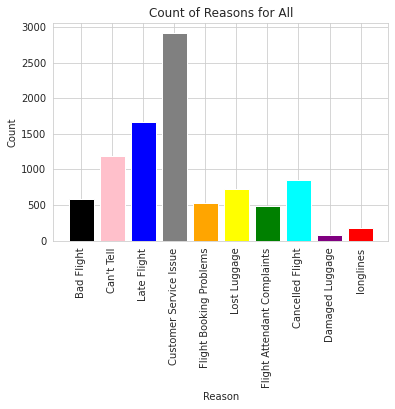

In [27]:
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['black','pink','blue','grey','orange','yellow','green','cyan','purple','red'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')

In [28]:
tweets['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [29]:
#check if any column have null value
tweets.isnull().values.any()


True

In [30]:
sentiment_ordering = ['negative', 'neutral', 'positive']
#y = y.apply(lambda x: sentiment_ordering.index(x))
#y.head(10)


In [31]:
#converting outcomes to numerical values
#nlp['airline_sentiment'] = nlp['airline_sentiment'].map({'neutral' :0, 'positive' :1, 'negative' :2}).astype(int) #mapping numbers
#nlp.head()

In [32]:
# CountVectorizer  is used to transform a given text into a vector on
# the basis of the frequency (count) of each word that occurs in the entire text.

cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=cv.fit_transform(cleaned_data).toarray()

"""
fit_transform is used on the training data so that we can scale the training data and also
 learn the scaling parameters. Here, the model built will learn the mean and variance of the features of the training set. 
These learned parameters are then further used to scale our test data.
"""

print(X_fin)

print(y)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: sentiment, Length: 14640, dtype: int64


In [33]:
"""
The multinomial Naive Bayes classifier is suitable for classification
 with discrete features (e.g., word counts for text classification). 
The multinomial distribution normally requires integer feature counts
"""

'\nThe multinomial Naive Bayes classifier is suitable for classification\n with discrete features (e.g., word counts for text classification). \nThe multinomial distribution normally requires integer feature counts\n'

**Naive model
**

In [34]:
model=MultinomialNB()
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.2)
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1625  140   84]
 [ 254  312   62]
 [ 111   39  301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1849
           1       0.64      0.50      0.56       628
           2       0.67      0.67      0.67       451

    accuracy                           0.76      2928
   macro avg       0.71      0.68      0.69      2928
weighted avg       0.76      0.76      0.76      2928

Accuracy: 0.764344262295082
